<a href="https://colab.research.google.com/github/Kalejita/Yolo-Robloflow/blob/main/xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
!pip install split-folders pillow ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="l2mg2itONLbJUmFRW2hd")
project = rf.workspace("rajneeldutta").project("teethdetection-rjah4")
version = project.version(9)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TeethDetection-9 in yolov8:: 100%|██████████| 1490/1490 [00:00<00:00, 2894.55it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Specify the path to the file
file_path = '/content/TeethDetection-9/data.yaml'

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file at {file_path} exists.")
else:
    print(f"The file at {file_path} does not exist.")

The file at /content/TeethDetection-9/data.yaml exists.


In [5]:
# Get the current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# List all files and directories in the current directory
files = os.listdir(cwd)
print(f"Files and directories in '{cwd}': {files}")

Current working directory: /content
Files and directories in '/content': ['.config', 'TeethDetection-9', 'sample_data']


In [6]:
dir_path = cwd + "/sample_data"
for files in os.listdir(dir_path):
  os.remove(dir_path + "/" + files)
os.rmdir(dir_path)

In [7]:
from ultralytics import YOLO
model = YOLO("yolov8l.pt")
model.info()

100%|██████████| 83.7M/83.7M [00:00<00:00, 110MB/s]


YOLOv8l summary: 209 layers, 43,691,520 parameters, 0 gradients, 165.7 GFLOPs


(209, 43691520, 0, 165.742848)

In [8]:
from ultralytics import settings

# View all settings

settings.update({'datasets_dir': '/content/TeethDetection-9'})

In [9]:
# os.chdir("/content")
# Entrenar el modelo
model.train(
    data='/content/TeethDetection-9/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,  # Ajusta según tu GPU
    name="entrenamiento_xray",
    project="proyecto_xray"
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/TeethDetection-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrenamiento_xray, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1856.0±1019.5 MB/s, size: 196.5 KB)


train: Scanning /content/TeethDetection-9/train/labels... 678 images, 6 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<00:00, 2091.34it/s]

train: New cache created: /content/TeethDetection-9/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1088.1±1012.8 MB/s, size: 164.8 KB)


val: Scanning /content/TeethDetection-9/valid/labels... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 922.20it/s]

val: New cache created: /content/TeethDetection-9/valid/labels.cache


Plotting labels to proyecto_xray/entrenamiento_xray/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to proyecto_xray/entrenamiento_xray
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.61G      1.817      1.784      1.568        237        640: 100%|██████████| 43/43 [00:35<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         35       1007     0.0027     0.0278    0.00138   0.000893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.68G      1.333     0.7173       1.29        252        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         35       1007     0.0296      0.291     0.0189     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.67G       1.36      0.701      1.287        232        640: 100%|██████████| 43/43 [00:35<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         35       1007      0.879      0.936      0.958      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.55G      1.327     0.6494       1.28        234        640: 100%|██████████| 43/43 [00:34<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         35       1007      0.847      0.881      0.929      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.55G      1.282     0.6009      1.241        286        640: 100%|██████████| 43/43 [00:34<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         35       1007      0.865      0.943      0.912      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       9.5G      1.271     0.6076       1.24        208        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         35       1007      0.933       0.95      0.976       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.52G      1.232      0.584      1.221        268        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         35       1007      0.926      0.978      0.966      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.59G      1.225     0.5629      1.213        315        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.928      0.978       0.98      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       9.5G      1.202     0.5459      1.194        299        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         35       1007      0.938      0.963      0.977      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.62G       1.19     0.5469      1.189        362        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         35       1007      0.945       0.97      0.977      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.58G      1.185      0.535      1.172        342        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.934      0.966       0.98      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.56G      1.176      0.522      1.192        187        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         35       1007      0.948      0.965      0.982      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.58G      1.145     0.5109       1.17        280        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.928      0.959      0.974      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.45G      1.149     0.5069      1.157        316        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35       1007      0.947      0.961       0.98      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.68G      1.156       0.51      1.165        216        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         35       1007      0.934      0.982      0.976       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.59G       1.12     0.4953      1.146        208        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         35       1007      0.942      0.972      0.978      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.55G      1.143     0.5006       1.15        186        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         35       1007       0.93      0.982      0.974      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.65G      1.107     0.4862      1.137        303        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.938      0.975      0.981      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.43G      1.115     0.4909      1.133        274        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         35       1007      0.942      0.969      0.981      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.62G      1.088     0.4756      1.129        309        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         35       1007      0.939      0.947      0.975      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.55G      1.117     0.4875      1.145        264        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         35       1007      0.937      0.967      0.978      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.59G      1.103     0.4838      1.131        310        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         35       1007      0.948      0.966      0.974      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.59G      1.066     0.4596       1.12        134        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         35       1007      0.942      0.971      0.979      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.69G      1.085     0.4777       1.13        356        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         35       1007      0.943      0.966      0.978      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.53G      1.067     0.4707      1.113        255        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         35       1007      0.938      0.977      0.979      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.48G      1.053       0.46      1.105        258        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.943      0.973      0.975      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       9.4G      1.041     0.4484      1.103        209        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35       1007      0.949      0.965       0.98      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.57G      1.036     0.4466      1.101        213        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007       0.95      0.972      0.972      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.43G      1.027     0.4454      1.089        238        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         35       1007      0.944      0.971      0.979      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.58G      1.028     0.4445      1.094        250        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         35       1007      0.956      0.965      0.973      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.73G      1.014     0.4395      1.075        229        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35       1007      0.948       0.97      0.978      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.51G     0.9979     0.4367      1.076        128        640: 100%|██████████| 43/43 [00:34<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         35       1007      0.947      0.969      0.976      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.56G     0.9883     0.4269      1.076        225        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         35       1007      0.937      0.945      0.966      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.51G       0.99     0.4345       1.07        442        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         35       1007      0.941      0.979       0.97      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.55G      1.001     0.4499      1.073        241        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.941      0.954      0.978      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.59G     0.9655     0.4223       1.06        358        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         35       1007      0.943      0.967      0.979      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.51G     0.9488     0.4093      1.055        418        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         35       1007       0.95      0.963      0.983      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       9.7G     0.9576     0.4162      1.055        207        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35       1007      0.963      0.969      0.985      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.39G     0.9453     0.4067      1.051        268        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.956      0.963      0.977      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.58G     0.9497     0.4156      1.051        260        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35       1007      0.939      0.964      0.969      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       9.6G     0.9356     0.4068      1.046        251        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.944      0.961      0.973      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.58G     0.9441     0.4095       1.05        211        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         35       1007      0.946      0.975      0.974      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.46G     0.9298     0.4031      1.031        223        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.944      0.975      0.976      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.53G     0.9214     0.4012      1.035        183        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.945      0.956      0.973      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.56G     0.9122     0.3964      1.034        142        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35       1007      0.951      0.964      0.984      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.58G     0.9013     0.3909      1.032        125        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         35       1007      0.955      0.962      0.979       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.46G     0.8895     0.3922      1.026        130        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35       1007      0.944      0.971      0.972      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.52G     0.8727     0.3826      1.013        327        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35       1007      0.935      0.973       0.97      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.43G     0.8923     0.3885      1.015        380        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35       1007      0.943       0.96      0.972      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.58G     0.8857      0.387      1.029        244        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         35       1007       0.94      0.976      0.973      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       9.6G     0.8869     0.3775      1.013        422        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         35       1007      0.953      0.956      0.973      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       9.6G     0.8723     0.3709      1.006        276        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.934      0.965      0.973      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.57G     0.8504     0.3645      1.001        206        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         35       1007      0.944      0.962      0.972      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.67G     0.8322      0.363     0.9901        334        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.941      0.971      0.977      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.62G     0.8452     0.3684     0.9993        423        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.951      0.945      0.975      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.53G     0.8319     0.3672     0.9952        168        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         35       1007      0.948      0.933      0.962      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.53G     0.8265     0.3642     0.9812        243        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         35       1007      0.946      0.971      0.979      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.58G     0.8167     0.3604      1.006        208        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         35       1007      0.943       0.96      0.965      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.74G     0.8215      0.361     0.9841        301        640: 100%|██████████| 43/43 [00:34<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.947      0.956      0.972      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.55G     0.8139      0.356     0.9917        221        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35       1007      0.937      0.968      0.973      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.59G     0.8095     0.3537     0.9838        271        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         35       1007      0.933      0.969      0.964      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.58G     0.7969     0.3506      0.989        180        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         35       1007      0.928      0.972      0.972      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       9.4G     0.7901      0.345     0.9764        173        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         35       1007      0.944       0.96      0.973      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.46G     0.7748     0.3429     0.9635        308        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         35       1007      0.925      0.976       0.97      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.61G      0.761     0.3349     0.9677        423        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         35       1007      0.933      0.979      0.971       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.65G     0.7757     0.3428     0.9735        401        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.946      0.956      0.971      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.44G     0.7694     0.3387     0.9698        235        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35       1007      0.936      0.967      0.971      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.49G     0.7544     0.3357     0.9607        224        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35       1007      0.953      0.951      0.973      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       9.6G     0.7556     0.3372      0.962        405        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         35       1007      0.943       0.98      0.975      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.54G     0.7378     0.3286     0.9568        411        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         35       1007      0.953      0.966      0.975      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.39G     0.7458     0.3333     0.9638        225        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         35       1007      0.934      0.976      0.976      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.67G      0.727     0.3288     0.9565        304        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         35       1007      0.946      0.955      0.973      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.56G     0.7264     0.3274     0.9552        289        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         35       1007      0.947      0.963      0.974      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.75G     0.7215     0.3229     0.9513        243        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         35       1007      0.945       0.96      0.977      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       9.8G     0.7093     0.3175     0.9476        180        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.942      0.958      0.983      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.49G     0.7151     0.3222     0.9505        241        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         35       1007      0.956      0.955      0.979      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.46G     0.6962     0.3158      0.945        164        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         35       1007       0.94      0.959      0.972      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.71G     0.6853     0.3113     0.9393        338        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.945      0.965      0.977      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.75G     0.6857     0.3088     0.9385        368        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35       1007      0.952      0.955      0.979      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.61G     0.6847     0.3104     0.9378        169        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         35       1007       0.93      0.971      0.971      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.54G     0.6689     0.3046     0.9294        259        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         35       1007       0.94      0.969      0.973      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.54G     0.6714     0.3081      0.927        323        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         35       1007      0.928      0.972      0.969      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.72G     0.6637     0.3041     0.9257        197        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         35       1007      0.935      0.967      0.975      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.49G     0.6516     0.2991     0.9308        318        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         35       1007      0.957      0.954      0.975      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       9.5G     0.6397      0.294     0.9218        187        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         35       1007      0.943      0.957      0.973      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       9.5G      0.657      0.301     0.9278        161        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         35       1007      0.938      0.961      0.972      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.61G     0.6374     0.2938     0.9203        237        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         35       1007      0.937      0.966      0.975      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.49G     0.6476     0.2968     0.9242        179        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         35       1007      0.938      0.973      0.975      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.47G     0.6421     0.2903     0.9249        190        640: 100%|██████████| 43/43 [00:34<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         35       1007      0.928      0.979      0.972       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.52G     0.6283      0.289     0.9127        213        640: 100%|██████████| 43/43 [00:34<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         35       1007      0.935       0.97      0.973      0.694


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.63G     0.5888     0.2637     0.9432        176        640: 100%|██████████| 43/43 [00:35<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         35       1007      0.931      0.972      0.972      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.74G     0.5712     0.2578     0.9344        171        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         35       1007      0.946      0.959      0.973      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.74G     0.5548     0.2516     0.9234        169        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35       1007      0.931      0.971      0.973      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.73G     0.5464     0.2502     0.9244        143        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         35       1007      0.939      0.963      0.973      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.89G     0.5412     0.2473     0.9223        177        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35       1007      0.943      0.958      0.971       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.78G     0.5282     0.2434     0.9122        176        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         35       1007      0.941      0.958       0.97       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.77G     0.5315     0.2449     0.9145        186        640: 100%|██████████| 43/43 [00:33<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         35       1007       0.94      0.966      0.971      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.73G     0.5228     0.2421     0.9119        169        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         35       1007      0.939      0.966      0.971      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.61G     0.5148      0.239     0.9095        177        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         35       1007      0.939      0.964      0.972      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.76G     0.5119     0.2377     0.9066        172        640: 100%|██████████| 43/43 [00:33<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         35       1007      0.944      0.962      0.973      0.694



100 epochs completed in 1.141 hours.
Optimizer stripped from proyecto_xray/entrenamiento_xray/weights/last.pt, 87.7MB
Optimizer stripped from proyecto_xray/entrenamiento_xray/weights/best.pt, 87.7MB

Validating proyecto_xray/entrenamiento_xray/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


                   all         35       1007      0.937      0.967      0.973      0.708
                 tooth         34       1007      0.937      0.967      0.973      0.708
Speed: 0.2ms preprocess, 17.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to proyecto_xray/entrenamiento_xray


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b810b783890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
import os

# Listar archivos en el directorio
directory = "/content/proyecto_xray/entrenamiento_xray"
if os.path.exists(directory):
    print("Archivos en el directorio:")
    print(os.listdir(directory))
else:
    print(f"El directorio {directory} no existe.")

Archivos en el directorio:
['args.yaml', 'train_batch3872.jpg', 'results.csv', 'confusion_matrix.png', 'confusion_matrix_normalized.png', 'train_batch1.jpg', 'val_batch1_labels.jpg', 'weights', 'P_curve.png', 'val_batch0_labels.jpg', 'F1_curve.png', 'R_curve.png', 'labels.jpg', 'val_batch1_pred.jpg', 'train_batch3870.jpg', 'results.png', 'PR_curve.png', 'train_batch3871.jpg', 'val_batch0_pred.jpg', 'labels_correlogram.jpg', 'train_batch2.jpg', 'train_batch0.jpg']


In [11]:
# Crear DataFrame de métricas de entrenamiento
df_metrics = pd.read_csv("/content/proyecto_xray/entrenamiento_xray/results.csv")


# Mostrar algunas métricas
print(df_metrics.head(5))

print(df_metrics.index.to_list())
print(df_metrics.columns.to_list())

df_metrics.describe()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   37.2510         1.81703         1.78375         1.56807   
1      2   80.0406         1.33296         0.71727         1.28957   
2      3  119.2180         1.35956         0.70097         1.28738   
3      4  162.5350         1.32723         0.64940         1.28020   
4      5  204.2280         1.28157         0.60093         1.24121   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00270            0.02781           0.00138   
1               0.02960            0.29096           0.01886   
2               0.87925            0.93644           0.95822   
3               0.84722            0.88083           0.92895   
4               0.86518            0.94316           0.91215   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00089       3.05270           inf       3.16564  0.000543   
1              0.01034       1.51446  

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2077.912686,0.892291,0.408929,1.039624,0.920783,0.948021,0.953962,0.663884,1.108240,inf,1.314787,0.000833,0.000833,0.000833
std,29.011492,1191.721007,0.235716,0.172810,0.113823,0.130815,0.115450,0.135808,0.097568,0.210289,NaN,0.209796,0.000466,0.000466,0.000466
min,1.000000,37.251000,0.511870,0.237700,0.906560,0.002700,0.027810,0.001380,0.000890,0.972420,0.372940,1.200180,0.000033,0.000033,0.000033
25%,25.750000,1072.822500,0.713615,0.320993,0.949772,0.935310,0.958973,0.971665,0.668542,1.048270,0.385598,1.253880,0.000442,0.000442,0.000442
50%,50.500000,2072.330000,0.879205,0.380060,1.012880,0.941715,0.965490,0.973390,0.681775,1.071205,0.407730,1.286640,0.000834,0.000834,0.000834
75%,75.250000,3102.475000,1.056612,0.459710,1.106935,0.945985,0.971200,0.977090,0.692277,1.111220,0.440132,1.322185,0.001226,0.001226,0.001226
max,100.000000,4100.710000,1.817030,1.783750,1.568070,0.962540,0.982400,0.985060,0.707680,3.052700,inf,3.165640,0.001621,0.001621,0.001621


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


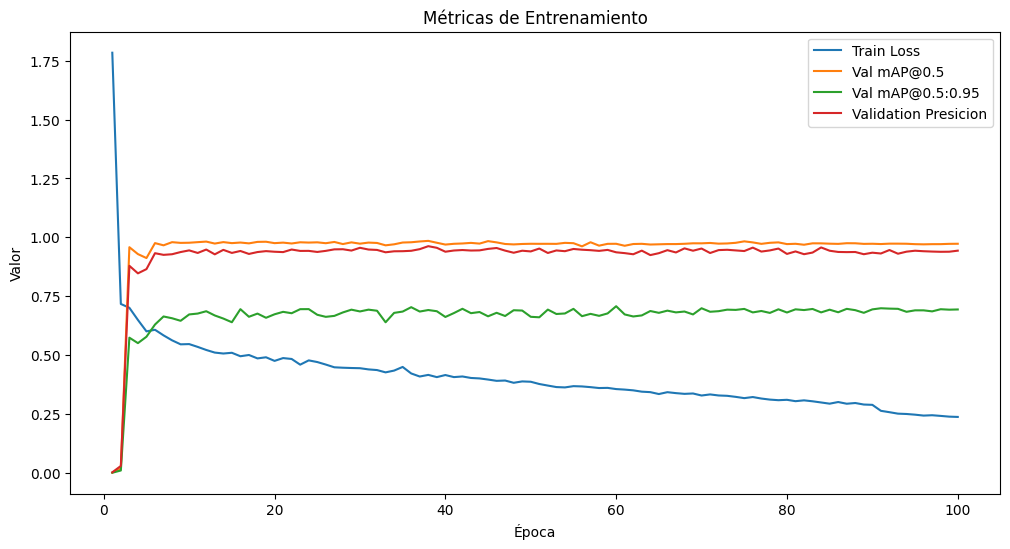

In [12]:
print(df_metrics.columns.to_list())
# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(df_metrics[['epoch']], df_metrics[['train/cls_loss']], label='Train Loss')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50(B)']], label='Val mAP@0.5')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50-95(B)']], label='Val mAP@0.5:0.95')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/precision(B)']], label='Validation Presicion')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Métricas de Entrenamiento')
plt.legend()
plt.show()

In [13]:
# Evaluar el modelo
results = model.val()

# Mostrar los resultados
print(results)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2903.1±951.9 MB/s, size: 174.0 KB)


val: Scanning /content/TeethDetection-9/valid/labels.cache... 35 images, 1 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]


                   all         35       1007      0.937      0.967      0.973      0.707
                 tooth         34       1007      0.937      0.967      0.973      0.707
Speed: 2.9ms preprocess, 50.9ms inference, 0.0ms loss, 11.6ms postprocess per image
Results saved to proyecto_xray/entrenamiento_xray2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8196b6bed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.0

In [16]:
# Cargar el modelo entrenado
# modelo_entrenado = YOLO("/content/yolov8n.pt")
modelo_entrenado = YOLO("/content/proyecto_xray/entrenamiento_xray/weights/best.pt")

# Realizar inferencia en una imagen
resultados = modelo_entrenado.predict(source="/content/rx1.jpg", save=True)

# Acceder a los resultados
for resultado in resultados:
    print(f"Predicciones para la imagen: {resultado.path}")

    for caja, conf, clase in zip(resultado.boxes.xyxy, resultado.boxes.conf, resultado.boxes.cls):
        print(f"Bounding Box: {caja} - Confianza: {conf} - Clase: {clase}")


image 1/1 /content/rx1.jpg: 480x640 2 screws, 32 tooths, 75.5ms
Speed: 3.7ms preprocess, 75.5ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
Predicciones para la imagen: /content/rx1.jpg
Bounding Box: tensor([ 70.1777, 127.5841, 132.9214, 232.0893], device='cuda:0') - Confianza: 0.8719518184661865 - Clase: 1.0
Bounding Box: tensor([407.3276, 173.4815, 454.0705, 305.4400], device='cuda:0') - Confianza: 0.8600150942802429 - Clase: 1.0
Bounding Box: tensor([251.2275, 155.5387, 300.5127, 290.4294], device='cuda:0') - Confianza: 0.8594634532928467 - Clase: 1.0
Bounding Box: tensor([445.4492, 152.4183, 491.2571, 297.2252], device='cuda:0') - Confianza: 0.8533234596252441 - Clase: 1.0
Bounding Box: tensor([ 26.9127, 114.6222,  91.2999, 204.9749], device='cuda:0') - Confianza: 0.851929247379303 - Clase: 1.0
Bounding Box: tensor([206.6844, 284.6851, 272.0650, 398.2365], device='cuda:0') - Confianza: 0.8517245054244995 - Clase: 1.0
Bound

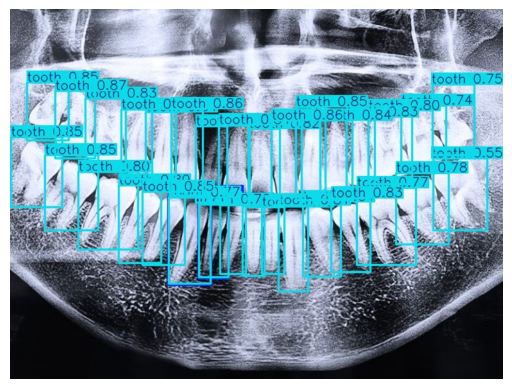

In [17]:
# Cargar y mostrar la imagen con las predicciones
img = Image.open("/content/runs/detect/predict2/rx1.jpg")
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [18]:
import shutil
from google.colab import files

# Especifica el nombre de la carpeta que deseas comprimir y descargar
folder_path = "/content/proyecto_xray"  # Ruta de la carpeta en Colab
output_filename = "xrayV1.zip"   # Nombre del archivo zip de salida

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Descargar el archivo ZIP
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>